In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver

In [2]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
from gillespy2.solvers.cpp import SSACSolver
model = MichaelisMenten()
csolver = SSACSolver(model)

In [4]:
dresults = model.run(solver=csolver, show_labels=True)
print(dresults[0]['A'])

[301. 263. 249. 236. 232. 233. 222. 220. 218. 215. 209. 205. 205. 203.
 199. 189. 187. 185. 186. 178. 170. 167. 176. 168. 172. 169. 158. 146.
 149. 146. 139. 139. 131. 127. 131. 125. 130. 120. 117. 112. 106. 107.
 108. 106. 113. 108.  99.  97.  90.  89.  83.  80.  86.  80.  90.  85.
  90.  81.  77.  72.  75.  74.  74.  73.  68.  61.  60.  59.  57.  49.
  50.  50.  49.  48.  50.  50.  45.  47.  47.  45.  52.  47.  48.  42.
  39.  40.  36.  30.  36.  36.  38.  37.  35.  30.  31.  28.  27.  24.
  20.  23.  24.]


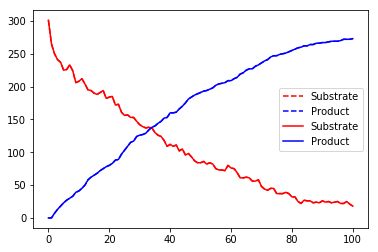

In [5]:
model = MichaelisMenten()
results = model.run(show_labels=False)
dresults = model.run(solver=csolver, show_labels=False)
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [6]:
import time
from gillespy2.solvers.auto.ssa_solver import SSASolver, ssa_solvers
from gillespy2.solvers.stochkit import StochKitSolver
from gillespy2.solvers.cpp import SSACSolver
import numpy as np
log2_trajectories_max = 10
loops = 100
solvers = [StochKitSolver, csolver] #  SSASolver, BasicSSASolver
timing_data = np.zeros((log2_trajectories_max+1,len(solvers)+1))
for n in range(0,log2_trajectories_max+1):
    timing_data[n, 0] = 2**n
    for i in range(loops):
        for solver in range(len(solvers)):
            time_start = time.perf_counter()
            model.run(solver=solvers[solver], show_labels=False, number_of_trajectories=2**n)
            time_end = time.perf_counter()
            timing_data[n, solver+1] += (time_end - time_start)/loops
    print("{0}:\tStochKit:{1}\tSSACSolver:{2}\tRatio:{3}".format(timing_data[n,0], timing_data[n,1], timing_data[n, 2], (timing_data[n, 1]/timing_data[n, 2])))

ImportError: cannot import name 'ssa_solvers'

In [ ]:
plt.plot(timing_data[:,0],timing_data[:,1],'-r', label='StochKit')
plt.plot(timing_data[:,0],timing_data[:,2],'-b', label='Cython')
plt.plot(timing_data[:,0],timing_data[:,3],'-g', label='Numpy')
plt.plot(timing_data[:,0],timing_data[:,4],'-k', label='Python')
plt.title("SSA Simulation Time")
plt.ylabel("Seconds")
plt.xlabel("Trajectories")
plt.legend(loc='best')
plt.savefig("SSA_Comparisons3.png")